In [165]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [166]:
# Load data
def load_data(file_path):
    column_names = [
        "Class", "Attribute1", "Attribute2", "Attribute3", "Attribute4", "Attribute5"
    ]
    df = pd.read_csv(file_path, names=column_names, na_values='?')
    return df

In [167]:
def preprocess_data(df):
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [168]:
# Train model
def train_model(X_train, y_train):
    model = HistGradientBoostingClassifier()
    model.fit(X_train, y_train)
    joblib.dump(model, 'thyroid_model.pkl')
    return model

In [169]:
# Evaluate model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43



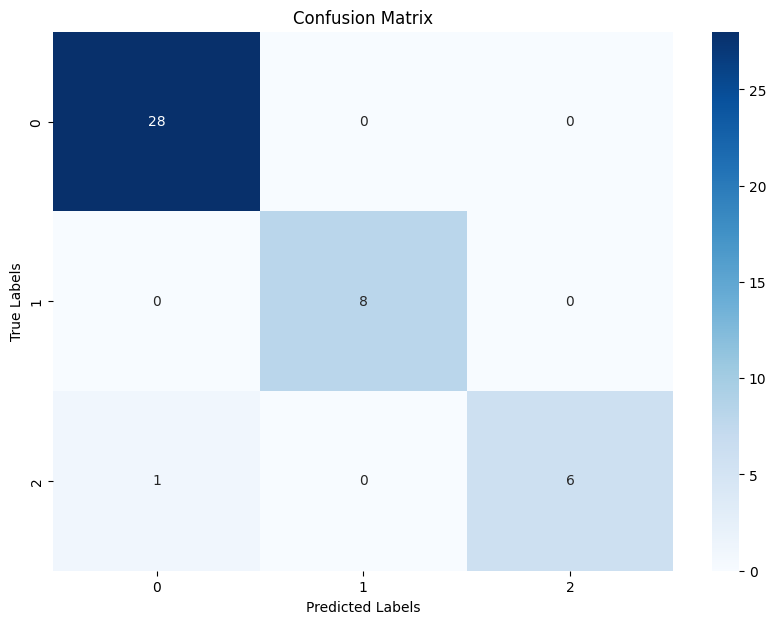

In [170]:
# Main workflow
if __name__ == "__main__":
    # Step 1: Load data
    df = load_data('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data')

    # Step 2: Preprocess data
    X_train, X_test, y_train, y_test = preprocess_data(df)

    # Step 3: Train model
    model = train_model(X_train, y_train)

    # Step 4: Evaluate model
    evaluate_model(model, X_test, y_test)
